# Pre-processing and Training<a id='2_Data_wrangling'></a>

## Introduction<a id='2.2_Introduction'></a>

Lending loans is a significant source of revenue for banks, but it is not without risk. Loan defaults by borrowers are a common occurrence. To address this issue, we can use machine learning techniques to develop a robust model that can predict whether a new borrower is likely to default on their loan. The banks have gathered extensive data on past borrowers, and we can help to create a powerful machine learning model for this purpose.

The dataset provided is vast and includes various deterministic factors such as borrower's income, gender, loan purpose, and more. However, the dataset has issues with multicollinearity and missing values and we will try to fix these issues in this notebook.

## 1. Data Collection<a id='2.3_Imports'></a>

In [1]:
#Import pandas, matplotlib.pyplot, and seaborn in the correct lines below
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
import os


## 1.1 Load The Loan Default Data<a id='2.5_Load_The_Ski_Resort_Data'></a>

In [2]:
# the supplied CSV data file is the raw_data directory
loan_data = pd.read_csv('C:/Springboard/Capstone2/Loan_Default.csv')

Good first steps in auditing the data are the info method and displaying the first few records with head.

In [3]:
#Call the info method on loan_data to see a summary of the file
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

In [4]:
#Call the head method on loan_data to print the first several rows of the data
loan_data.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


## 2. Data Definition<a id='2.6_Explore_The_Data'></a>

### 2.1 Explore the features of our data<a id='2.6.1_Find_Your_Resort_Of_Interest'></a>

In [5]:
#Set number of columns to display all 34 columns
pd.set_option("display.max_columns", loan_data.shape[-1]) 
loan_data.head(5)

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,Neg_ammortization,interest_only,lump_sum_payment,property_value,construction_type,occupancy_type,Secured_by,total_units,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,116500,NaN,NaN,NaN,360.0,not_neg,not_int,not_lpsm,118000.0,sb,pr,home,1U,1740.0,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,206500,NaN,NaN,NaN,360.0,not_neg,not_int,lpsm,NaN,sb,pr,home,1U,4980.0,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,406500,4.56,0.2000,595.0,360.0,neg_amm,not_int,not_lpsm,508000.0,sb,pr,home,1U,9480.0,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,456500,4.25,0.6810,NaN,360.0,not_neg,not_int,not_lpsm,658000.0,sb,pr,home,1U,11880.0,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,696500,4.00,0.3042,0.0,360.0,not_neg,not_int,not_lpsm,758000.0,sb,pr,home,1U,10440.0,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [6]:
loan_data.columns

Index(['ID', 'year', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'Credit_Worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'Interest_rate_spread', 'Upfront_charges', 'term', 'Neg_ammortization',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'income', 'credit_type', 'Credit_Score', 'co-applicant_credit_type',
       'age', 'submission_of_application', 'LTV', 'Region', 'Security_Type',
       'Status', 'dtir1'],
      dtype='object')

In [7]:
#convert all features to lower case
loan_data.columns= loan_data.columns.str.lower()

In [8]:
#check result
loan_data.columns

Index(['id', 'year', 'loan_limit', 'gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'credit_worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'interest_rate_spread', 'upfront_charges', 'term', 'neg_ammortization',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'secured_by', 'total_units',
       'income', 'credit_type', 'credit_score', 'co-applicant_credit_type',
       'age', 'submission_of_application', 'ltv', 'region', 'security_type',
       'status', 'dtir1'],
      dtype='object')

To streamline the data and optimize the model's performance, we are selectively dropping unnecessary columns that are unlikely to have a significant impact on the results.

In [9]:
columns= ['id', 'year', 'loan_limit', 'gender', 'approv_in_adv','loan_purpose', 'credit_worthiness', 'open_credit','business_or_commercial','age', 'neg_ammortization','interest_only', 'lump_sum_payment','construction_type', 'occupancy_type', 'secured_by', 'total_units','credit_type', 'co-applicant_credit_type','submission_of_application', 'region', 'security_type']
loan_data.drop(columns, axis=1, inplace =True)

In [10]:
loan_data.columns

Index(['loan_type', 'loan_amount', 'rate_of_interest', 'interest_rate_spread',
       'upfront_charges', 'term', 'property_value', 'income', 'credit_score',
       'ltv', 'status', 'dtir1'],
      dtype='object')

### 2.2 Factors overview<a id='2.6.2_Number_Of_Missing_Values_By_Column'></a>

Let look at some factors of loan application in detail:

In [11]:
loan_data['loan_amount'].max()

3576500

In [12]:
loan_data['loan_amount'].min()

16500

In [13]:
loan_data['term'].value_counts()

360.0    121685
180.0     12981
240.0      5859
300.0      2822
324.0      2766
120.0       510
144.0       263
348.0       260
336.0       213
96.0        194
312.0       185
156.0       174
216.0       115
276.0       100
132.0        93
288.0        90
168.0        82
228.0        74
204.0        59
264.0        43
108.0        33
192.0        17
252.0         8
165.0         1
280.0         1
322.0         1
Name: term, dtype: int64

In [14]:
loan_data['rate_of_interest'].max()

8.0

In [15]:
#the factor we should pay attention for
loan_data['rate_of_interest'].min()

0.0

In [16]:
loan_data['rate_of_interest'].mean()

4.045475804367777

In [17]:
loan_data['status'].value_counts()

0    112031
1     36639
Name: status, dtype: int64

In [18]:
loan_data['property_value'].max()

16508000.0

In [19]:
loan_data['property_value'].min()

8000.0

In [20]:
loan_data['property_value'].value_counts()

308000.0     2792
258000.0     2763
358000.0     2679
408000.0     2537
328000.0     2524
             ... 
4648000.0       1
3878000.0       1
5758000.0       1
2618000.0       1
2698000.0       1
Name: property_value, Length: 385, dtype: int64

In [21]:
loan_data['income'].max()

578580.0

In [22]:
loan_data['income'].min()

0.0

In [23]:
loan_data['income'].mean()

6957.338876146789

## 3. Data Cleaning<a id='2.6_Explore_The_Data'></a>

### 3.1 Duplicates and missing values<a id='2.6.2_Number_Of_Missing_Values_By_Column'></a>

First we check for duplicated entries and delete and we find them.

In [24]:
loan_data.duplicated().sum()

28

In [25]:
loan_data.drop_duplicates(inplace=True)

In [26]:
loan_data.duplicated().sum()

0

In [27]:
loan_data.shape

(148642, 12)

Now check for missing values in each column.

In [28]:
#Count (using `.sum()`) the number of missing values (`.isnull()`) in each column of 
#ski_data as well as the percentages (using `.mean()` instead of `.sum()`).
#Order them (increasing or decreasing) using sort_values
#Call `pd.concat` to present these in a single table (DataFrame) with the helpful column names 'count' and '%'
missing = pd.concat([loan_data.isnull().sum(), 100 * loan_data.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count', ascending=False)

,count,%
upfront_charges,39614,26.650610
interest_rate_spread,36611,24.630320
rate_of_interest,36411,24.495768
dtir1,24093,16.208743
property_value,15072,10.139799
ltv,15072,10.139799
income,9148,6.154384
term,41,0.027583
loan_type,0,0.000000
loan_amount,0,0.000000


We can see many columns with null values. We start working with them based on their data type.

In [29]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148642 entries, 0 to 148669
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_type             148642 non-null  object 
 1   loan_amount           148642 non-null  int64  
 2   rate_of_interest      112231 non-null  float64
 3   interest_rate_spread  112031 non-null  float64
 4   upfront_charges       109028 non-null  float64
 5   term                  148601 non-null  float64
 6   property_value        133570 non-null  float64
 7   income                139494 non-null  float64
 8   credit_score          148642 non-null  int64  
 9   ltv                   133570 non-null  float64
 10  status                148642 non-null  int64  
 11  dtir1                 124549 non-null  float64
dtypes: float64(8), int64(3), object(1)
memory usage: 14.7+ MB


### 3.2 Divide and conquer <a id='2.6.2_Number_Of_Missing_Values_By_Column'></a>

Devide data for categorical and numerical values and handle each of them separately.

In [30]:
dtypes = pd.DataFrame(loan_data.dtypes).reset_index()

categ_type = []
numer_type = []
for i, l in zip(dtypes['index'], dtypes[0]):
    if l == 'object':
        categ_type.append(i)
    else:
        numer_type.append(i)

In [31]:
#Start with numeric data type
loan_data_num = loan_data[numer_type]

#knn
knn = KNNImputer(n_neighbors = 3)
knn.fit(loan_data_num)
X = knn.fit_transform(loan_data_num)

#Check for any nas
loan_data_num = pd.DataFrame(X, columns=numer_type)
nas_num = loan_data_num.isna().sum()
print(nas_num)


loan_amount             0
rate_of_interest        0
interest_rate_spread    0
upfront_charges         0
term                    0
property_value          0
income                  0
credit_score            0
ltv                     0
status                  0
dtir1                   0
dtype: int64


In [32]:
# Categorical data type
loan_data_cat = loan_data[categ_type]

for i in categ_type:
    mode = loan_data[i].mode()
    mode = mode[0]
    loan_data_cat[i].fillna(value=mode, inplace=True)

# Check for any nas
nas_cat = loan_data_cat.isna().sum()
print(nas_cat)

loan_type    0
dtype: int64


C:\Users\bayar\AppData\Local\Temp\ipykernel_17496\3135984884.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data_cat[i].fillna(value=mode, inplace=True)


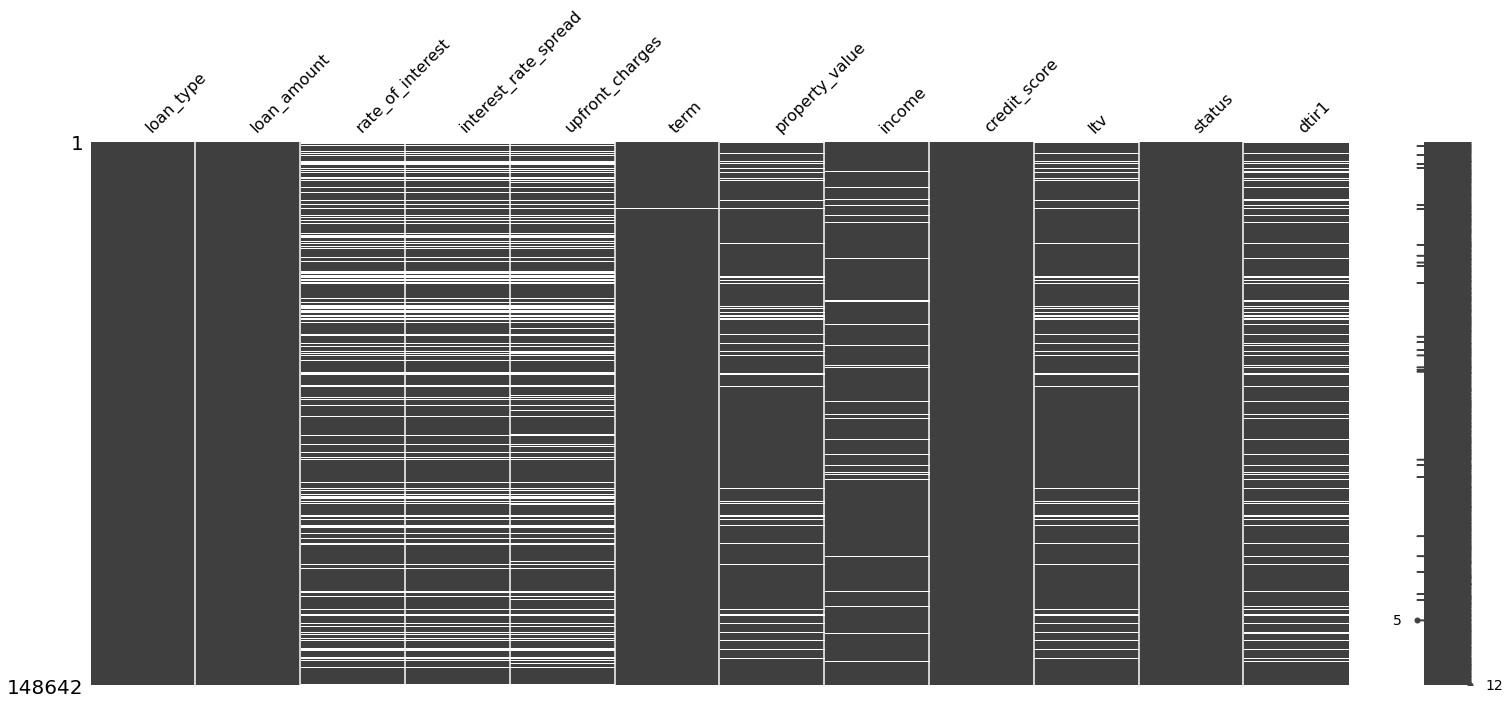

<Figure size 1080x648 with 0 Axes>

In [33]:
import missingno as msno

# Full dataframe visualization of null values
msno.matrix(loan_data)
plt.figure(figsize = (15,9))
plt.show()

In [34]:
loan_data_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148642 entries, 0 to 148669
Data columns (total 1 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   loan_type  148642 non-null  object
dtypes: object(1)
memory usage: 2.3+ MB


Convert our categorical data into numerical for machine learning model.

In [35]:
loan_data_cat = pd.get_dummies(loan_data_cat, columns=categ_type, drop_first=True)

In [36]:
loan_data_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148642 entries, 0 to 148669
Data columns (total 2 columns):
 #   Column           Non-Null Count   Dtype
---  ------           --------------   -----
 0   loan_type_type2  148642 non-null  uint8
 1   loan_type_type3  148642 non-null  uint8
dtypes: uint8(2)
memory usage: 1.4 MB


In [37]:
# Combining dataframes
loan_data_comb = pd.concat([loan_data_num, loan_data_cat], axis=1, join='inner')

In [38]:
loan_data_comb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148614 entries, 0 to 148641
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amount           148614 non-null  float64
 1   rate_of_interest      148614 non-null  float64
 2   interest_rate_spread  148614 non-null  float64
 3   upfront_charges       148614 non-null  float64
 4   term                  148614 non-null  float64
 5   property_value        148614 non-null  float64
 6   income                148614 non-null  float64
 7   credit_score          148614 non-null  float64
 8   ltv                   148614 non-null  float64
 9   status                148614 non-null  float64
 10  dtir1                 148614 non-null  float64
 11  loan_type_type2       148614 non-null  uint8  
 12  loan_type_type3       148614 non-null  uint8  
dtypes: float64(11), uint8(2)
memory usage: 13.9 MB


Now all our dataset is clean and ready to be used for training.

### 3.3 Visualizing correlations <a id='2.6.2_Number_Of_Missing_Values_By_Column'></a>

With our data now in a pristine state, it's time to delve into some exploration and analysis. We begin by plotting the pairwise relationships in the dataset, to check out how our variables relate to one another.

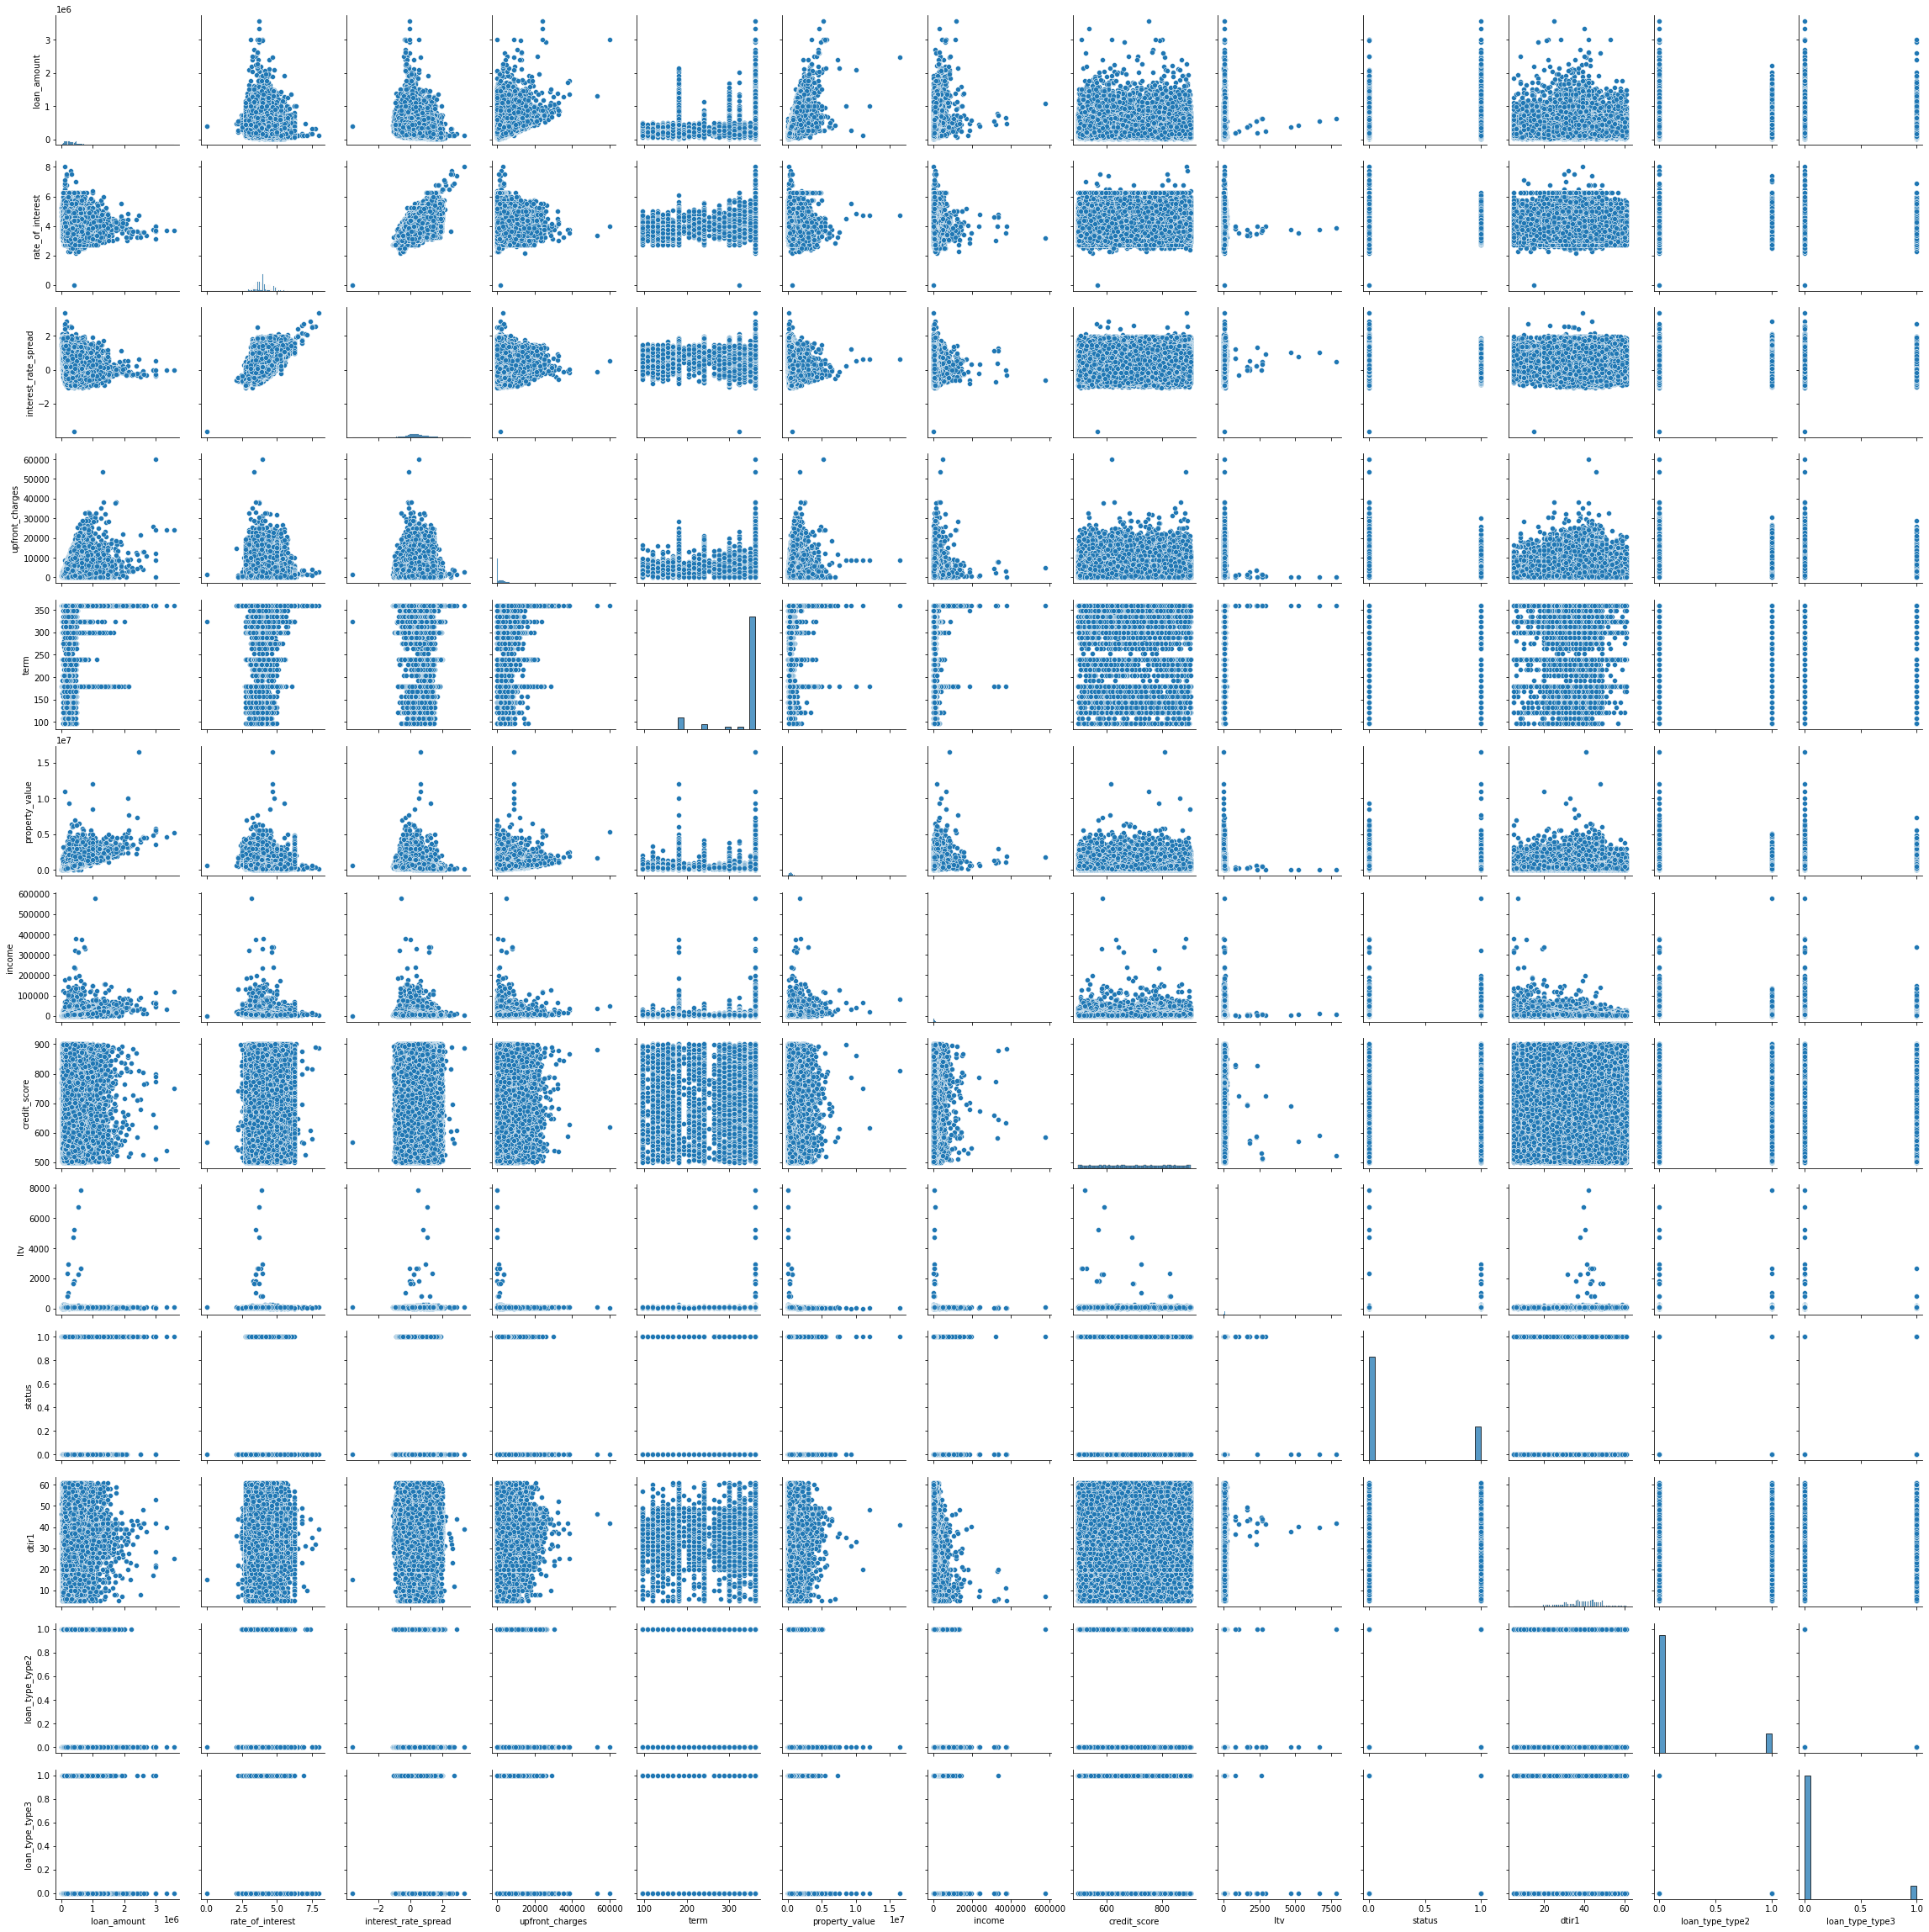

In [39]:
sns.pairplot(loan_data_comb)

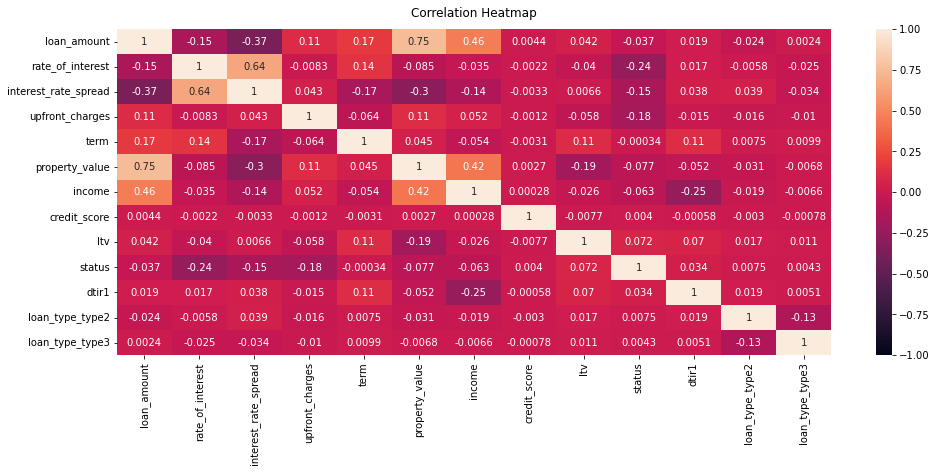

In [40]:
# Now we can plot a heatmap to see correlations 
corr = loan_data_comb.corr()

# Correlation Heatmap
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(corr, vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

There is a relatively strong correlation (0.75) between the loan amount and property value variables respectively. To present it visually we call the lineplot() method on our sns object. Make the x-axis parameter 'loan_amount', the y-axis parameter 'propert_value'.

'Status' is our dependent variable for regression analysis and we can plot each of our attributes using "status" as a hue parameter.

<AxesSubplot:xlabel='loan_amount', ylabel='property_value'>

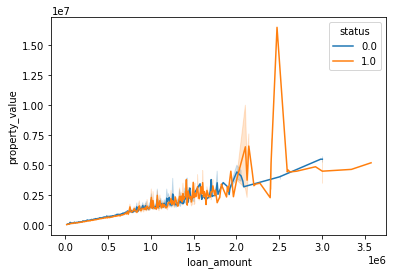

In [41]:
sns.lineplot(data=loan_data_comb, x ="loan_amount", y ="property_value", hue = "status")

<AxesSubplot:xlabel='loan_amount', ylabel='Density'>

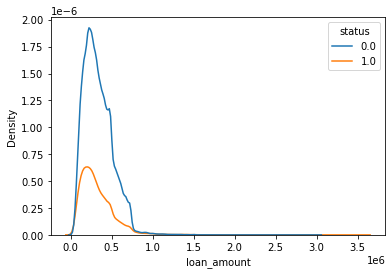

In [42]:
sns.kdeplot(data=loan_data_comb, x="loan_amount", hue="status")

<AxesSubplot:xlabel='property_value', ylabel='Density'>

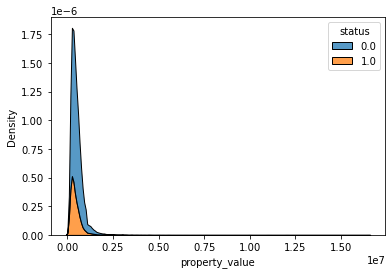

In [43]:
sns.kdeplot(data=loan_data_comb, x="property_value", hue="status", multiple="stack")

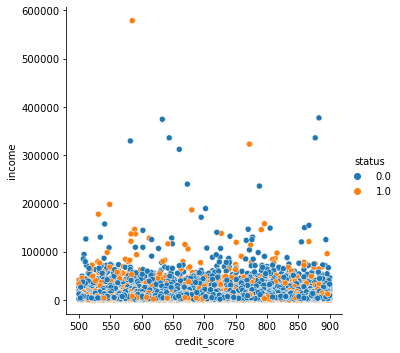

In [44]:
sns.relplot(data=loan_data_comb, x = "credit_score", y = "income", hue = "status")

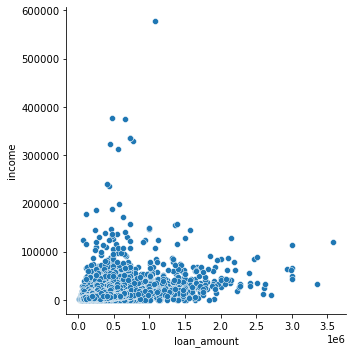

In [45]:
sns.relplot(data=loan_data_comb, x ="loan_amount", y ="income")

<AxesSubplot:xlabel='loan_amount', ylabel='income'>

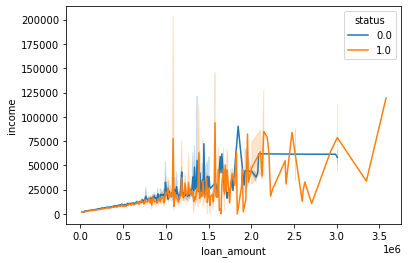

In [46]:
sns.lineplot(data=loan_data_comb, x ="loan_amount", y ="income", hue = "status")

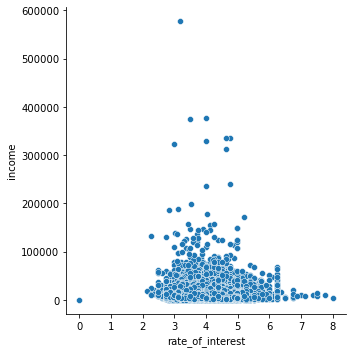

In [47]:
sns.relplot(data=loan_data_comb, x ="rate_of_interest", y ="income")

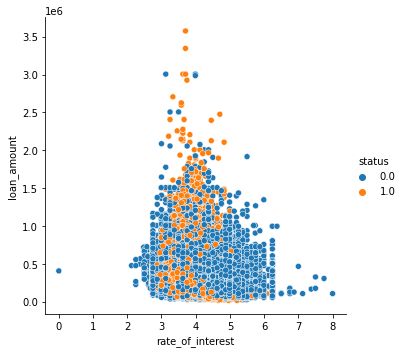

In [48]:
sns.relplot(data=loan_data_comb, x ="rate_of_interest", y ="loan_amount", hue="status")

<AxesSubplot:xlabel='loan_type', ylabel='count'>

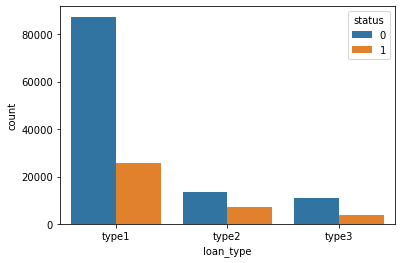

In [49]:
sns.countplot(data=loan_data, x="loan_type", hue="status")

<AxesSubplot:xlabel='status', ylabel='loan_amount'>

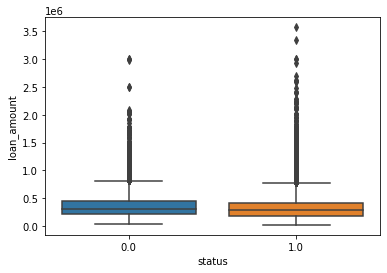

In [50]:
sns.boxplot(data=loan_data_comb, x="status", y ="loan_amount")

<AxesSubplot:xlabel='ltv', ylabel='Count'>

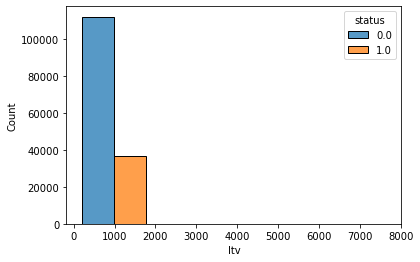

In [51]:
sns.histplot(data=loan_data_comb, x='ltv', hue="status", multiple="dodge", shrink=.8, bins=4)

<AxesSubplot:xlabel='credit_score', ylabel='Count'>

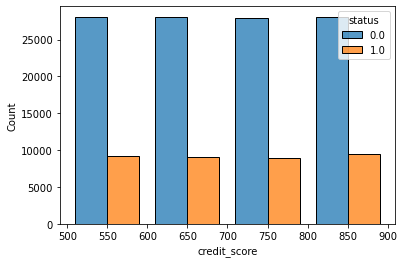

In [52]:
sns.histplot(data=loan_data_comb, x="credit_score", hue="status", multiple="dodge", shrink=.8, bins=4)

<AxesSubplot:xlabel='dtir1', ylabel='Count'>

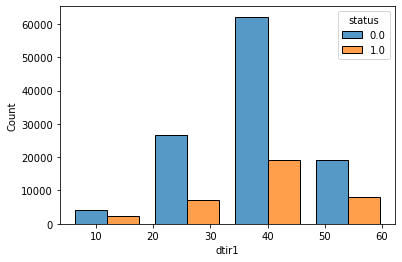

In [53]:
sns.histplot(data=loan_data_comb, x='dtir1', hue="status", multiple="dodge", shrink=.8, bins=4)

## 4. Modeling <a id='2.7_Derive_State-wide_Summary_Statistics_For_Our_Market_Segment'></a>

### 4.1 Train/Test Split  <a id='2.6.2_Number_Of_Missing_Values_By_Column'></a>

In [54]:
# Subsetting our data into our dependent and independent variables.
x = loan_data_comb.drop('status', axis=1)
y = loan_data_comb['status']

In [55]:
x

,loan_amount,rate_of_interest,interest_rate_spread,upfront_charges,term,property_value,income,credit_score,ltv,dtir1,loan_type_type2,loan_type_type3
0,116500.0,3.583333,-0.031267,1386.013333,360.0,118000.000000,1740.0,758.0,98.728814,45.000000,0,0
1,206500.0,3.708333,0.522967,1878.310000,360.0,251333.333333,4980.0,552.0,84.795549,34.666667,1,0
2,406500.0,4.560000,0.200000,595.000000,360.0,508000.000000,9480.0,834.0,80.019685,46.000000,0,0
3,456500.0,4.250000,0.681000,704.900000,360.0,658000.000000,11880.0,587.0,69.376900,42.000000,0,0
4,696500.0,4.000000,0.304200,0.000000,360.0,758000.000000,10440.0,602.0,91.886544,39.000000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
148637,436500.0,3.125000,0.257100,9960.000000,180.0,608000.000000,7860.0,659.0,71.792763,48.000000,0,0
148638,586500.0,5.190000,0.854400,0.000000,360.0,788000.000000,7140.0,569.0,74.428934,15.000000,0,0
148639,446500.0,3.125000,0.081600,1226.640000,180.0,728000.000000,6900.0,702.0,61.332418,49.000000,1,0
148640,196500.0,3.500000,0.582400,4323.330000,180.0,278000.000000,7140.0,737.0,70.683453,29.000000,0,0


In [56]:
x.shape

(148614, 12)

In [57]:
y

0         1.0
1         1.0
2         0.0
3         0.0
4         0.0
         ... 
148637    0.0
148638    0.0
148639    0.0
148640    0.0
148641    0.0
Name: status, Length: 148614, dtype: float64

In [58]:
y.shape

(148614,)

In [59]:
import statsmodels.api as sm
from statsmodels.graphics.api import abline_plot
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import linear_model, preprocessing


# Split the data. This line uses the sklearn function train_test_split().
# The test_size parameter means we can train with 70% of the data, and test on 30%.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3)

In [60]:
# We now want to check the shape of the X train, y_train, X_test and y_test to make sure the proportions are right. 
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(104029, 12) (104029,)
(44585, 12) (44585,)


In [61]:
y_train.value_counts()

0.0    78501
1.0    25528
Name: status, dtype: int64

## Summary <a id='2.7_Derive_State-wide_Summary_Statistics_For_Our_Market_Segment'></a>

The goal of the preprocessing work is to prepare our data for fitting models.

In the preprocessing step, we performed several tasks. First, we converted our categorical data into numerical format using the get_dummies() function in Section 3.2. This transformation allows us to work with categorical variables in our models effectively.

Afterwards, we proceeded to split our data into a training set and a test set. We allocated 70% of the data to the training set, which will be used to train our models. The remaining 30% was assigned to the test set, which will be used to evaluate the performance of our trained models on unseen data.

With the completion of these preprocessing steps, our data is now ready for the modeling phase. The training set will be utilized to build and train various models, while the test set will enable us to assess their performance and generalization capabilities.

By appropriately preprocessing the data, we have laid the foundation for effective modeling and can proceed with training and evaluating our models.